# Color Discretization

### ColorDiscretizer demo

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

In [3]:
from utils.color_discretizer import ColorDiscretizer
from utils.color_utils import YUV_to_RGB, RGB_to_YUV
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

%matplotlib inline

/home/shared/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
cd = ColorDiscretizer(max_categories=33, nbins=10, weighting_lambda=.05)
imdir = "../data/sun_inet_big_train/"
cd.train(imdir, 1000)

../utils/color_discretizer.py:88: RuntimeWarning: divide by zero encountered in log10
  logheatmap = np.log10(hm)
../utils/color_discretizer.py:104: RuntimeWarning: divide by zero encountered in log10
  logweights_matrix = np.log10(weights_matrix)


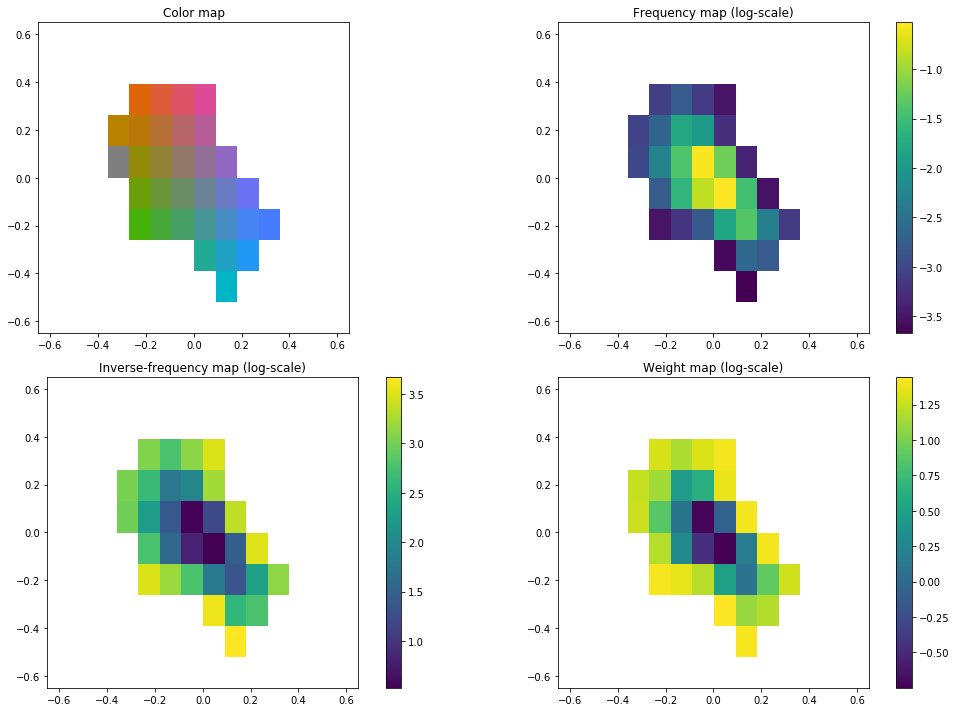

In [12]:
cd.plot_heatmap()

In [49]:
from matplotlib.pyplot import imread
from utils.color_utils import RGB_to_YUV

image = imread("../data/iccv09Data/images/0000051.jpg").astype(np.dtype("float32"))
YUVimage = RGB_to_YUV(image)
UVimage = YUVimage[:, :, 1:]
UVpixels = np.reshape(UVimage, newshape=[-1, 2])

In [50]:
cd.categorize(UVimage)

array([[28, 28, 28, ..., 28, 28, 28],
       [28, 28, 28, ..., 28, 28, 28],
       [28, 28, 28, ..., 28, 28, 28],
       ...,
       [17, 17, 17, ..., 17, 17, 17],
       [17, 17, 17, ..., 17, 17, 17],
       [17, 17, 17, ..., 17, 17, 17]])

In [51]:
for i in range(cd.n_categories):
    print(i, 
          cd.indices_to_xycategories_map[i], 
          '\t', 
          cd.categories_mean_pixels[i],
          '\t',
          cd.category_frequency[i],
          '\t',
          cd.weights[i],
         )

0 (0, 5) 	 [0. 0.] 	 2.173157162726008e-06 	 50.661770786357636
1 (1, 4) 	 [-0.315 -0.065] 	 7.127955493741307e-05 	 48.68273791239223
2 (1, 5) 	 [-0.315  0.065] 	 3.911682892906815e-06 	 50.61001280525765
3 (1, 6) 	 [-0.315  0.195] 	 1.1735048678720445e-05 	 50.37840462943133
4 (2, 4) 	 [-0.225 -0.065] 	 9.822670375521558e-05 	 47.95231102669094
5 (2, 5) 	 [-0.225  0.065] 	 0.006996696801112656 	 9.905502501095901
6 (2, 6) 	 [-0.225  0.195] 	 2.3904728789986093e-05 	 50.02230895412405
7 (3, 3) 	 [-0.135 -0.195] 	 4.694019471488178e-05 	 49.3618714252074
8 (3, 4) 	 [-0.135 -0.065] 	 0.004546244784422809 	 13.79288434059868
9 (3, 5) 	 [-0.135  0.065] 	 0.020521557719054243 	 3.876048889609914
10 (3, 6) 	 [-0.135  0.195] 	 0.0031258692628650902 	 17.854336978118255
11 (3, 7) 	 [-0.135  0.325] 	 0.000206884561891516 	 45.21673211784198
12 (3, 8) 	 [-0.135  0.455] 	 0.00034987830319888736 	 42.059140321778436
13 (3, 9) 	 [-0.135  0.585] 	 5.737134909596662e-05 	 49.06850782082912
14 (4, 2)

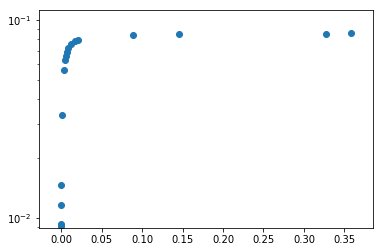

In [52]:
plt.scatter(cd.category_frequency.values(),
        [a * b for a, b in zip(cd.category_frequency.values(),
                              cd.weights.values())])
plt.yscale('log')
plt.show()

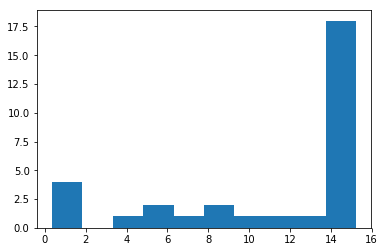

In [9]:
plt.hist(list(cd.weights.values()))
plt.show()

In [10]:
categories_distributions = np.abs(np.random.rand(4, 4, cd.n_categories))
cd.UVpixels_from_distribution(categories_distributions)

array([[[-0.04929327,  0.04074449],
        [-0.05818743,  0.0137647 ],
        [-0.05367304,  0.05407989],
        [-0.06451225,  0.07013271]],

       [[-0.05734778,  0.07163605],
        [-0.03870547,  0.06551245],
        [-0.04417763,  0.01566429],
        [-0.05218789,  0.05671626]],

       [[-0.08030168,  0.08297797],
        [-0.08848292,  0.10790108],
        [-0.06864252,  0.04427837],
        [-0.06270097,  0.15152076]],

       [[-0.04551862,  0.02019178],
        [-0.08343352,  0.1070085 ],
        [-0.08090943,  0.06765029],
        [-0.09388085,  0.10013294]]])

### L2 cost of categorizing

In [11]:
image = imread("../data/iccv09Data/images/0002136.jpg").astype(np.dtype("float32"))
YUVimage = RGB_to_YUV(image)
UVimage = YUVimage[:, :, 1:]
Yimage = YUVimage[:, :, :1]

In [12]:
pixels_categories = cd.categorize(UVimage)

pixel_categories_onehot = to_categorical(pixels_categories, num_classes=cd.n_categories)

reconstructed_UVimage = cd.UVpixels_from_distribution(pixel_categories_onehot)

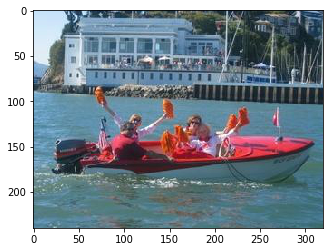

In [13]:
plt.imshow(YUV_to_RGB(np.concatenate([Yimage, UVimage], axis=2))/255.)
plt.show()

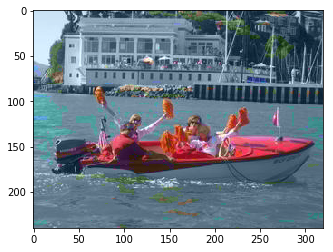

In [14]:
plt.imshow(YUV_to_RGB(np.concatenate([Yimage, reconstructed_UVimage], axis=2)) / 255)
plt.show()

In [15]:
np.linalg.norm(reconstructed_UVimage - UVimage, axis = (0, 1)) / len(UVpixels) / np.std(UVpixels, axis = 0)

array([0.00206049, 0.00302631])

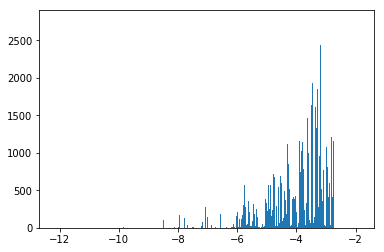

In [16]:
plt.hist(np.reshape(np.log(np.abs(reconstructed_UVimage - UVimage)), [-1, 1]), bins = 1000)
plt.show()

Note that sometimes, the return to RGB space goes over 255 or below 0, so we added a correction to the function.

In [17]:
print(np.max(YUV_to_RGB(np.concatenate([Yimage, UVimage], axis=2),correction = False)))
print(np.min(YUV_to_RGB(np.concatenate([Yimage, UVimage], axis=2),correction = False)))

255.00000000000006
-1.4155343563970746e-14


In [18]:
print(np.max(YUV_to_RGB(np.concatenate([Yimage, reconstructed_UVimage], axis=2), correction = False)))
print(np.min(YUV_to_RGB(np.concatenate([Yimage, reconstructed_UVimage], axis=2), correction = False)))

277.43265854835556
-18.135016685761983


### Thresholding out rare pixels

/Users/marc/Documents/Dropbox/Stanford/Class/3rdQuarter/CS231N/project/all-colors-matter/utils/color_discretizer.py:88: RuntimeWarning: divide by zero encountered in log10
  logheatmap = np.log10(hm)
/Users/marc/Documents/Dropbox/Stanford/Class/3rdQuarter/CS231N/project/all-colors-matter/utils/color_discretizer.py:103: RuntimeWarning: divide by zero encountered in log10
  logweights_matrix = np.log10(weights_matrix)


Remaining colors: 31
Remaining colors: 26
Remaining colors: 18
Remaining colors: 13


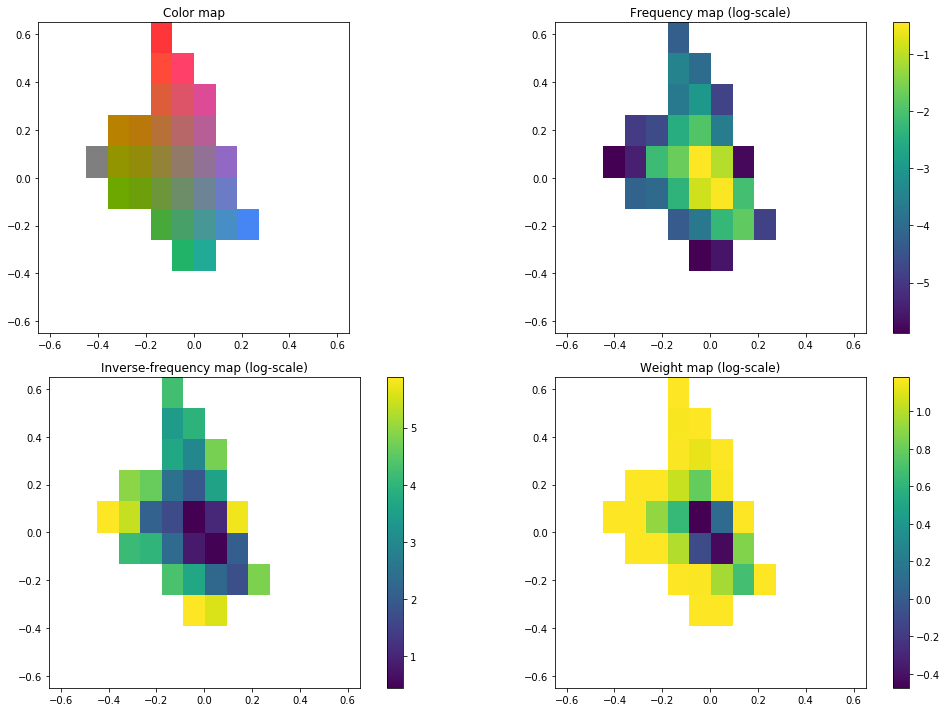

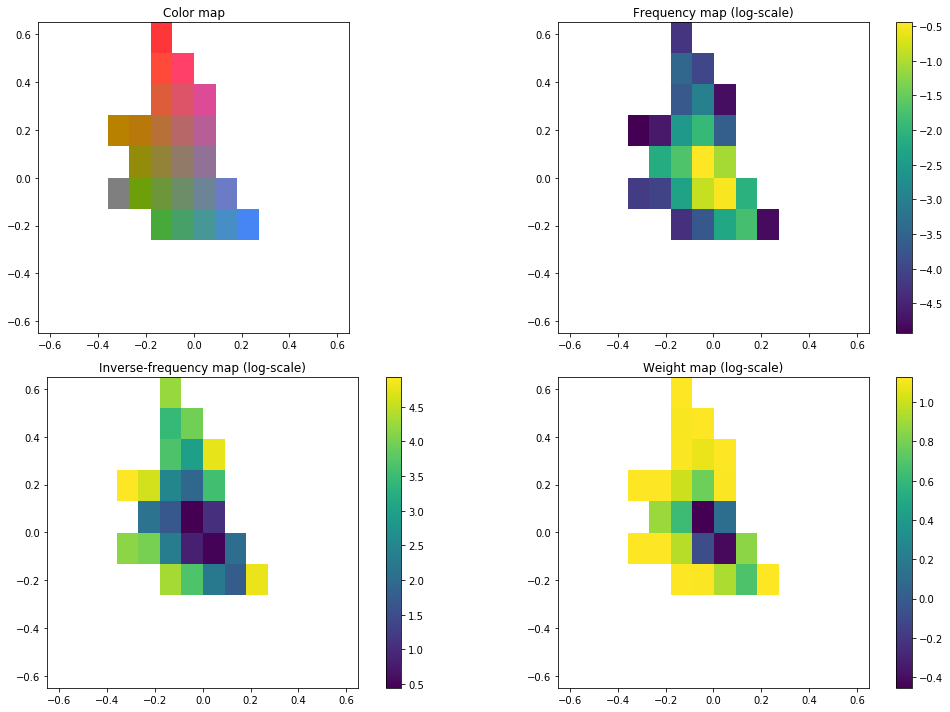

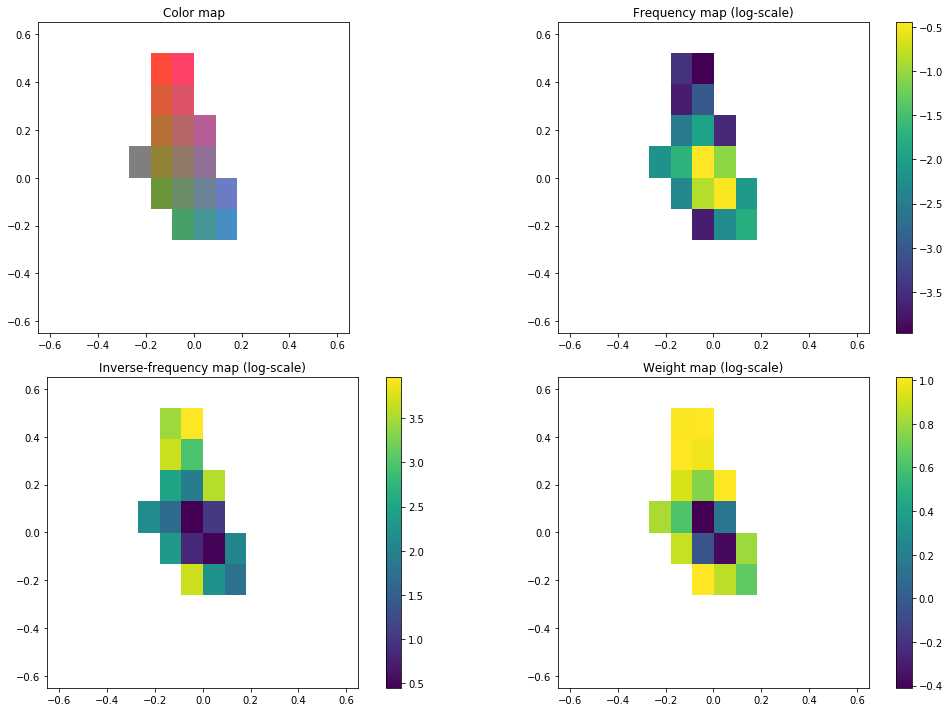

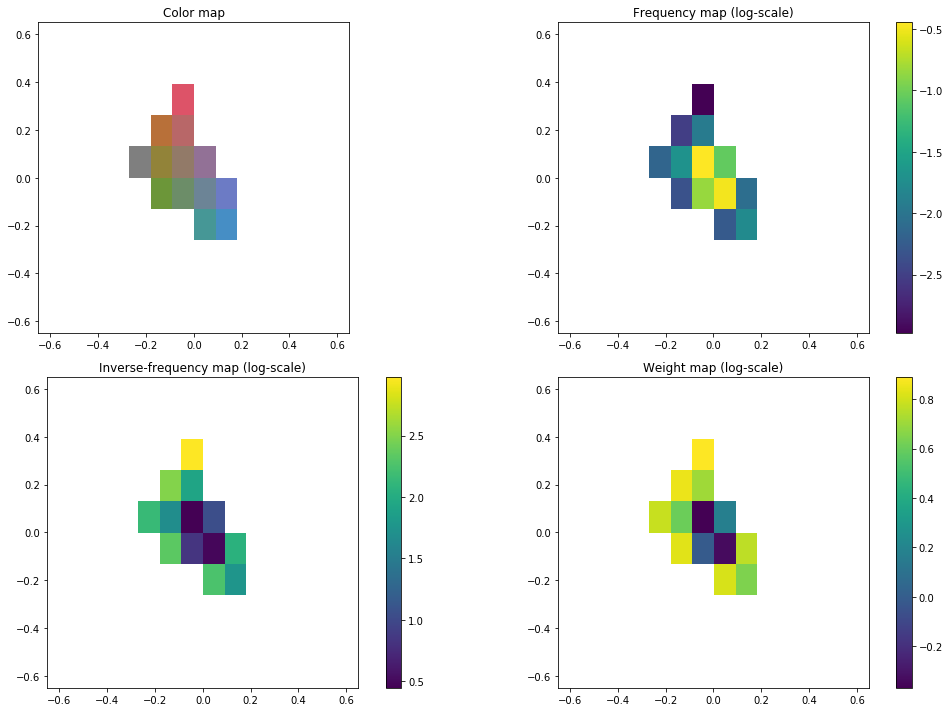

In [19]:
for threshold in [.000001, .00001, .0001, .001]:
    cd = ColorDiscretizer(threshold=threshold)
    imdir = "../data/iccv09Data/images/"
    cd.train(imdir, 30)
    cd.plot_heatmap()
    print("Remaining colors: {}".format(np.sum(cd.heatmap > cd.threshold)))

### Using a fixed number of categories

/Users/marc/Documents/Dropbox/Stanford/Class/3rdQuarter/CS231N/project/all-colors-matter/utils/color_discretizer.py:88: RuntimeWarning: divide by zero encountered in log10
  logheatmap = np.log10(hm)
/Users/marc/Documents/Dropbox/Stanford/Class/3rdQuarter/CS231N/project/all-colors-matter/utils/color_discretizer.py:103: RuntimeWarning: divide by zero encountered in log10
  logweights_matrix = np.log10(weights_matrix)


Remaining colors: 8
Remaining colors: 16
Remaining colors: 24
Remaining colors: 31
Remaining colors: 31


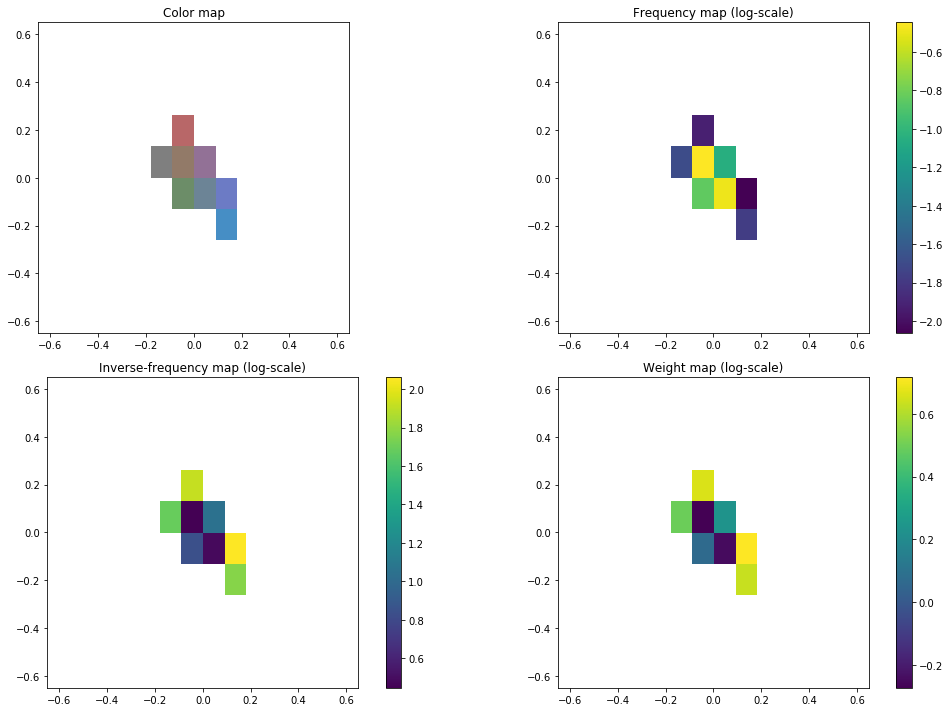

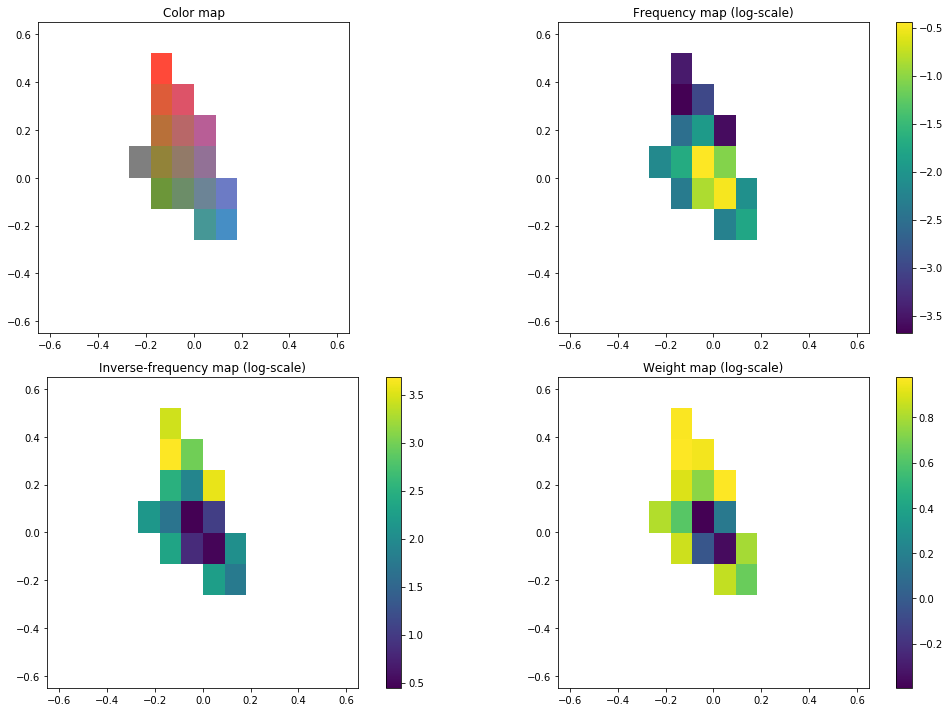

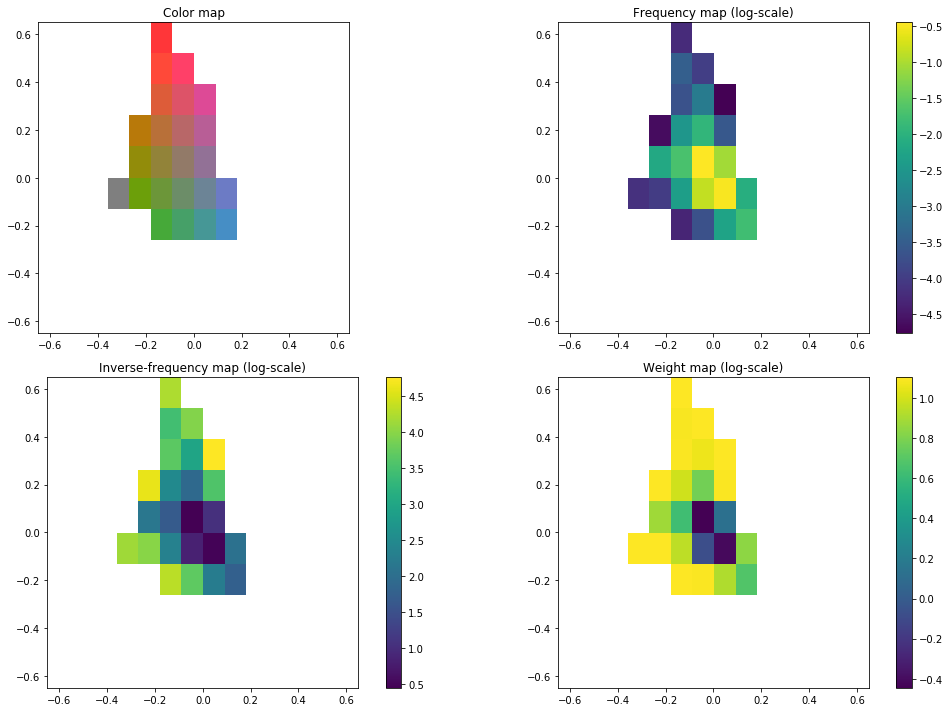

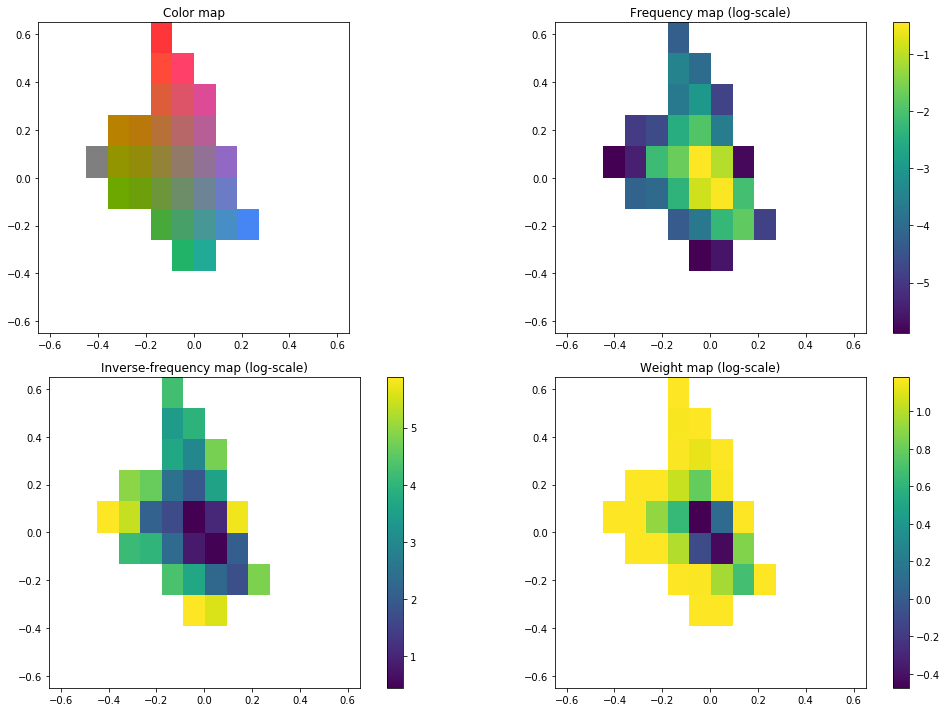

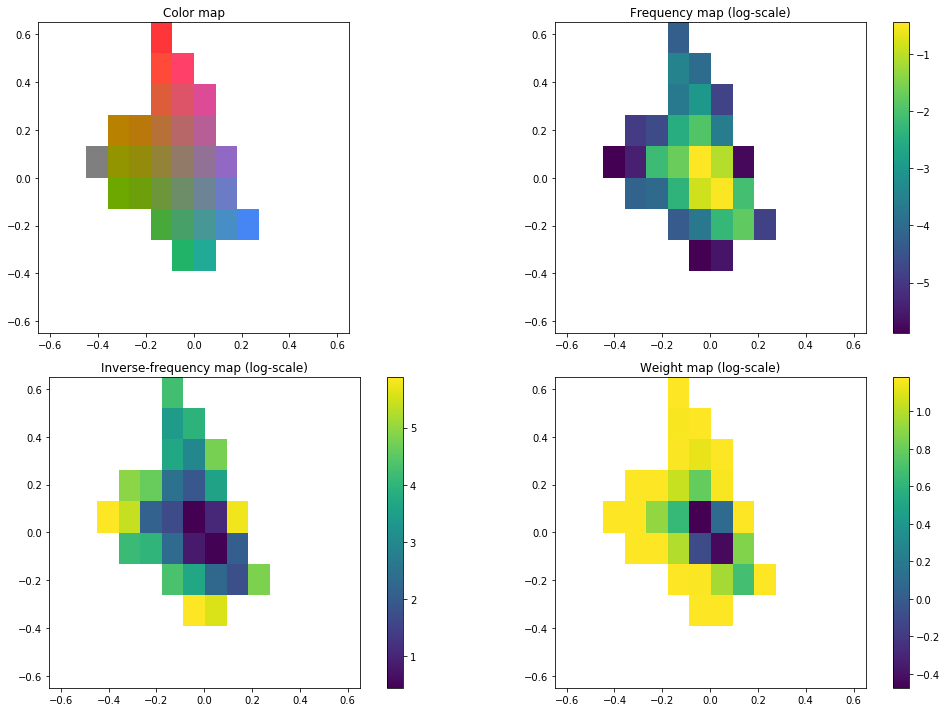

In [20]:
for max_cat in [8, 16, 24, 32, 40]:
    cd = ColorDiscretizer(threshold=.000001,max_categories=max_cat, nbins=10)
    imdir = "../data/iccv09Data/images/"
    cd.train(imdir, 30)
    cd.plot_heatmap()
    print("Remaining colors: {}".format(np.sum(cd.heatmap > cd.threshold)))

## Histograms

In [13]:
def plot_counter(c, title=""):
    values = [c.get(k, 0) for k in range(33)]
    values = [v / sum(values) for v in values]
    indexes = np.arange(33)
    width = .35

    plt.bar(indexes, values, width, color='g')
    plt.xticks(indexes, indexes)
    plt.ylabel("frequency", fontsize=12)
    plt.title(title, fontsize=17)

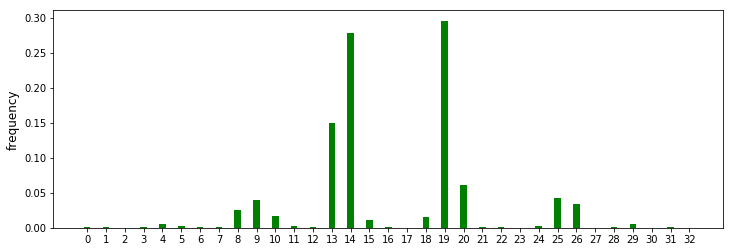

In [15]:
plt.figure(figsize=(12, 4))
plot_counter(cd.category_frequency)

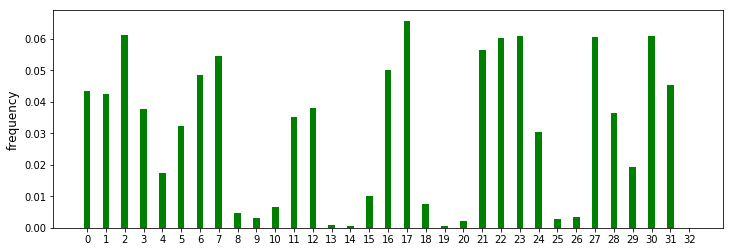

In [16]:
plt.figure(figsize=(12, 4))
plot_counter(cd.weights)